In [136]:
from collections import Counter
import pandas as pd
import numpy as np
import tqdm
import pickle
import matplotlib.pyplot as plt
from Bio.PDB import *
from rdkit import Chem
import os
import time
import shutil
from Bio.SeqUtils import seq1
import gzip
import tarfile
import sys
import random
from rdkit.Chem import rdFreeSASA
from rdkit import Chem
from rdkit.Chem.Descriptors import MolWt
import urllib
from lxml import etree
import requests as r
from Bio import SeqIO
from io import StringIO
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
import scipy.stats as ss
from scipy.interpolate import interpn
import matplotlib.colors as colors
import seaborn as sns
from rdkit.Chem import AllChem

In [3]:
### COPY DATA TO STARLIFE

In [4]:
clusters = pickle.load(open("/aloy/home/acomajuncosa/MurD/GitHub/alignment/MSA/clusters.pkl", "rb"))

path_in = "/aloy/home/acomajuncosa/MurD/GitHub/alignment/MSA/preparation"
path_out = "/slgpfs/projects/irb35/acomajuncosa/MurD/PDB/structures"

failed = []

In [59]:
elements = []
lib = 'LLM'
path_to_lib = "/slgpfs/projects/irb35/acomajuncosa/PocketVec_v2/data/libs/" + lib + "/TOP128_rDock_" + lib + "/ALL/all.sdf"

for protein in tqdm.tqdm(sorted(clusters)):
    
    # Iterate over each cluster
    for clust_numb in clusters[protein]:
        
        lab = "_".join([protein, str(clust_numb)])
        
        if os.path.exists(os.path.join(path_out, lab, "cluster_REFERENCE_" + protein + "_prep.mol2")) is False:
            
            if os.path.exists(os.path.join(path_in, protein, "cluster_REFERENCE_" + protein + "_prep.mol2")) is False:
            
                print(protein)
        
#         try:
        
#             # Create dir
#             if os.path.exists(os.path.join(path_out, lab)) is False: os.makedirs(os.path.join(path_out, lab))
#             # Copy files
#             shutil.copyfile(os.path.join(path_in, protein, "cluster_REFERENCE_" + protein + "_prep.mol2"), os.path.join(path_out, lab, "cluster_REFERENCE_" + protein + "_prep.mol2"))
#             shutil.copyfile(os.path.join(path_in, protein, "centroid_" + str(clust_numb) + ".sd"), os.path.join(path_out, lab, "centroid_" + str(clust_numb) + ".sd"))

#             elements.append([lab, path_to_lib, lib, os.path.join(path_out, lab, "centroid_" + str(clust_numb) + ".sd")])
            
#         except:
            
#             failed.append(protein)

  2%|▏         | 146/8739 [00:00<00:48, 175.74it/s]

A0A0B9X4I2


  4%|▍         | 392/8739 [00:02<00:47, 176.45it/s]

A0A0R4IMY7


  5%|▍         | 428/8739 [00:02<00:49, 169.06it/s]

A0A140KF01
A0A140NBS6


  6%|▌         | 497/8739 [00:02<00:51, 158.69it/s]

A0A1D9BJX7


 11%|█         | 934/8739 [00:05<00:44, 177.08it/s]

A3DCU1


 12%|█▏        | 1083/8739 [00:06<00:44, 170.18it/s]

A7MB62


 20%|██        | 1789/8739 [00:10<00:48, 142.34it/s]

E9Q555


 21%|██        | 1818/8739 [00:11<00:51, 135.60it/s]

F2Z5G5


 29%|██▉       | 2538/8739 [00:16<00:40, 154.93it/s]


KeyboardInterrupt: 

In [12]:
len(elements)

10967

In [17]:
N = 100
max_jobs = 990
total = np.array_split(elements, max(int(len(elements)/N)+1, 1))

In [20]:
##########################################
############ RUN POCKETVEC ###############
##########################################

In [ ]:
import sys
sys.path.insert(0, '/aloy/home/acomajuncosa/programs/hpc') #CHANGE THIS PATH TO YOUR HPC PATH!
from hpc import HPC
from starlife_config import config as cluster_config


for counter, elements in tqdm.tqdm(enumerate(total)):
    
    a = !ssh sl2 -t 'squeue -u irb35409 -h -t pending,running,completing -r | wc -l'
    time.sleep(2)

    while int(a[-1]) + N >= max_jobs:

        time.sleep(180)
        a = !ssh sl2 -t 'squeue -u irb35409 -h -t pending,running,completing -r | wc -l'


    scratch_path = "/slgpfs/scratch/irb35/acomajuncosa/MurD/PDB" 
    script_path = "/slgpfs/projects/irb35/acomajuncosa/MurD/scripts/gen_fps_rDock_center_PDB.py"

    ncpus = 1
    cluster = HPC(**cluster_config)
    njobs = len(elements)

    cluster_params = {}
    cluster_params['job_name'] = 'md_pdb_' + str(counter)
    cluster_params["jobdir"] = scratch_path
    cluster_params["memory"] = ncpus
    cluster_params['cpu'] = ncpus
    cluster_params["wait"] = False
    cluster_params["elements"] = elements
    cluster_params["num_jobs"] = len(elements)


    singularity_image = "/slgpfs/projects/irb35/acomajuncosa/rDock_image_2.simg"
    command = "singularity exec {} python {} <TASK_ID> <FILE>".format(
    singularity_image,
    script_path)

    cluster.submitMultiJob(command, **cluster_params)

2022-06-17 18:18:59,613 chemicalchecker.util.config.config.Config [DEBUG   ] CC_CONFIG environment variable not set. Using default config file.
2022-06-17 18:18:59,614 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/chemicalchecker/util/config/cc_config.json


module 'matplotlib.font_manager' has no attribute '_rebuild'


0it [00:00, ?it/s]2022-06-17 18:19:03,690 hpc.HPC      [DEBUG   ] HPC system to use: slurm
2022-06-17 18:19:03,694 hpc.HPC      [DEBUG   ] initializing object slurm
2022-06-17 18:19:03,833 slurm.slurm  [DEBUG   ] Job nasdfdsfsdfsdfdme is: md_pdb_0
2022-06-17 18:19:03,842 slurm.slurm  [DEBUG   ] Num elements submitted 100
2022-06-17 18:19:03,843 slurm.slurm  [DEBUG   ] Num Job submitted 100
2022-06-17 18:19:03,860 slurm.slurm  [INFO    ] Writing file /slgpfs/scratch/irb35/acomajuncosa/MurD/PDB/job-md_pdb_0.sh...
2022-06-17 18:19:03,873 slurm.slurm  [DEBUG   ] HPC submission: sbatch --parsable /slgpfs/scratch/irb35/acomajuncosa/MurD/PDB/job-md_pdb_0.sh
2022-06-17 18:19:07,269 slurm.slurm  [DEBUG   ] load SINGULARITY/3
1it [00:07,  7.53s/it]2022-06-17 18:19:09,869 hpc.HPC      [DEBUG   ] HPC system to use: slurm
2022-06-17 18:19:09,873 hpc.HPC      [DEBUG   ] initializing object slurm
2022-06-17 18:19:10,004 slurm.slurm  [DEBUG   ] Job nasdfdsfsdfsdfdme is: md_pdb_1
2022-06-17 18:19:10,00

In [2]:
path = '/slgpfs/scratch/irb35/acomajuncosa/MurD/PDB'

for file in tqdm.tqdm(sorted(os.listdir(path))):
    if '.o' in file:
        with open(os.path.join(path, file), "r") as f:
            for l in f:
                if "error" in l.lower() or "warning" in l.lower():
                    print(file)
                    break

100%|██████████| 11297/11297 [00:47<00:00, 239.77it/s]


In [3]:
### GENERATE POCKETVEC DESCRIPTORS GIVEN DOCKING SCORES

In [4]:
def zscore_fp(fp):
    mean = np.mean(fp)
    std = np.std(fp)
    return np.array([(i - mean) / std for i in fp])

def rank_fp(fp_raw):
    # Rank
    fp = ss.rankdata(fp_raw, method='max')
    # Increase ranking for positive scores
    for c in range(len(fp)):
        if fp_raw[c] > 0 and fp_raw[c] < 50:
            fp[c] = len(fp) + 1
        elif fp_raw[c] > 50 and fp_raw[c] < 100:
            fp[c] = len(fp) + 2
        elif fp_raw[c] > 100:
            fp[c] = len(fp) + 3
    return fp
    

def read_scores(file_scores):
    scores = {}
    with open(file_scores, "r") as f:
        for l in f:
            scores[l.split("\t")[0]] = float(l.split("\t")[1])
    return scores

def raw_fp(dict_scores, file_order):
    molecules = pickle.load(open(file_order, "rb"))
    return np.array([dict_scores[i] for i in molecules])

In [7]:
path = "/slgpfs/projects/irb35/acomajuncosa/MurD/PDB/structures"
sts = sorted(os.listdir(path))

In [43]:
fps = {}
fail = []

for st in tqdm.tqdm(sts):
    
    try:
    
        # Read scores
        scores = read_scores(os.path.join(path, st, "rDock_results_LLM", "scores"))

        # Raw scores fp
        raw = raw_fp(scores, "/slgpfs/projects/irb35/acomajuncosa/PocketVec_v2/data/libs/LLM/TOP128_rDock_LLM/ALL/all.pkl")
        pickle.dump(raw, open(os.path.join(path, st, "rDock_results_LLM", 'raw_fp.pkl'), "wb"))

        # Rank scores fp
        rank = rank_fp(raw)
        pickle.dump(rank, open(os.path.join(path, st, "rDock_results_LLM", 'rank_fp.pkl'), "wb"))

        fps[st] = rank
        
    except:
        
        fail.append(st)

100%|██████████| 11003/11003 [08:20<00:00, 21.98it/s]


In [5]:
# pickle.dump(fps, open("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/fps.pkl", "wb"))
fps = pickle.load(open("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/fps.pkl", "rb"))

In [6]:
print("Number of PocketVec descriptors: " + str(len(fps)))
print("Number of proteins: " + str(len(set([i.split("_")[0] for i in sorted(fps)]))))

Number of PocketVec descriptors: 10965
Number of proteins: 8711


In [7]:
murd_fps = {}

path = "/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/MurD/structures"
sts = ['SagaMurD_Frag349', "SagaMurD_Frag373", "SagaMurD_Frag374", "SagaMurD_Frag378", "SagaMurD_apo"]

for st in sts:
    rank = pickle.load(open(os.path.join(path, st, "rank_fp.pkl"), "rb"))
    murd_fps[st] = rank

In [8]:
all_sts = [fps[i] for i in sorted(fps)] + [murd_fps[i] for i in sorted(murd_fps)]
all_sts_ = [i for i in sorted(fps)] + [i for i in sorted(murd_fps)]

In [9]:
dist = pairwise_distances(all_sts, metric='cosine', n_jobs=4)

In [10]:
dist

array([[0.00000000e+00, 1.82234857e-01, 2.60570640e-01, ...,
        2.61215028e-01, 2.43776990e-01, 2.63655506e-01],
       [1.82234857e-01, 3.33066907e-16, 3.44146851e-01, ...,
        2.98516486e-01, 2.95930477e-01, 2.84448263e-01],
       [2.60570640e-01, 3.44146851e-01, 0.00000000e+00, ...,
        2.00157226e-01, 2.21799781e-01, 1.92693252e-01],
       ...,
       [2.61215028e-01, 2.98516486e-01, 2.00157226e-01, ...,
        0.00000000e+00, 4.26941001e-02, 6.13391888e-02],
       [2.43776990e-01, 2.95930477e-01, 2.21799781e-01, ...,
        4.26941001e-02, 0.00000000e+00, 6.56303728e-02],
       [2.63655506e-01, 2.84448263e-01, 1.92693252e-01, ...,
        6.13391888e-02, 6.56303728e-02, 0.00000000e+00]])

In [11]:
dist = np.array([j for c, i in enumerate(dist) for j in i[c+1:]])

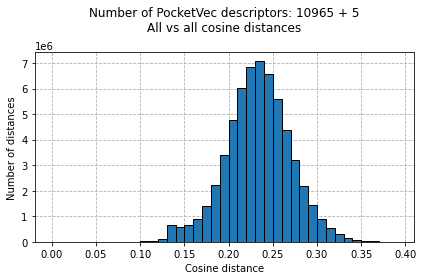

In [35]:
plt.hist(dist, bins=[i for i in np.arange(0, 0.4, 0.01)], ec='k', zorder=2)
plt.grid(linestyle='--', zorder=-2)
plt.title("Number of PocketVec descriptors: " + str(len(fps)) + " + " + str(len(murd_fps)) + "\nAll vs all cosine distances\n")
plt.xlabel("Cosine distance")
plt.ylabel("Number of distances")
plt.tight_layout()
plt.savefig("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/distances.png", dpi=300)

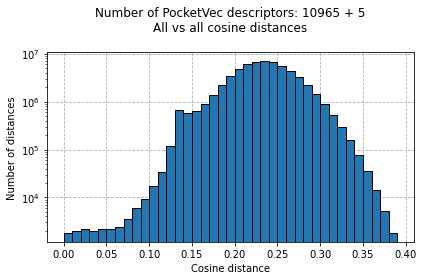

In [36]:
plt.hist(dist, bins=[i for i in np.arange(0, 0.4, 0.01)], ec='k', zorder=2)
plt.grid(linestyle='--', zorder=-2)
plt.title("Number of PocketVec descriptors: " + str(len(fps)) + " + " + str(len(murd_fps)) + "\nAll vs all cosine distances\n")
plt.yscale('log')
plt.xlabel("Cosine distance")
plt.ylabel("Number of distances")
plt.tight_layout()
plt.savefig("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/distances_log.png", dpi=300)

In [73]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
X = np.array(all_sts)
# tsne = TSNE(n_jobs=4)
# Y = tsne.fit_transform(X)
Y = PCA(n_components=2).fit_transform(X)

In [76]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('binary')
new_cmap = truncate_colormap(cmap, 0.4, 0.7)

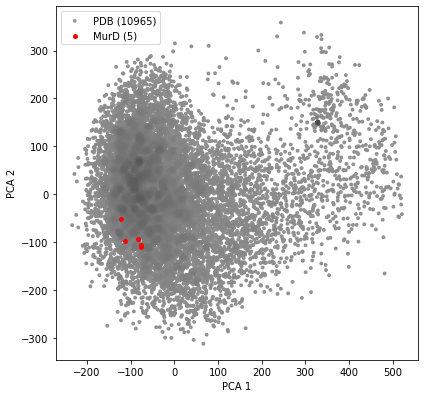

In [93]:
plt.figure(figsize=(6.5, 6.5))
# plot cc background (grey)
x = Y[:,0][:-5]
y = Y[:,1][:-5]
data , x_e, y_e = np.histogram2d(x, y, bins = 70, density = True )
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x, y, c=z, edgecolor=['none'], s=15, cmap=new_cmap, label='PDB (' + str(len(fps)) + ')')



x = Y[:,0][-5:]
y = Y[:,1][-5:]
plt.scatter(x, y, edgecolor=['none'], s=25, c='red', label='MurD (' + str(len(murd_fps)) + ')')

plt.xlabel("PCA 1")
plt.ylabel('PCA 2')
plt.legend()
plt.savefig("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/PCA.png", dpi=300)
plt.show()

In [20]:
### DISTANCES BETWEEN MURD AND PDB

In [21]:
dist = pairwise_distances([murd_fps[i] for i in sorted(murd_fps)], [fps[i] for i in sorted(fps)], metric='cosine')

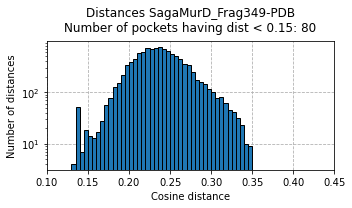

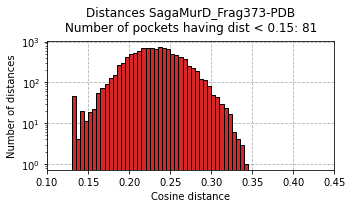

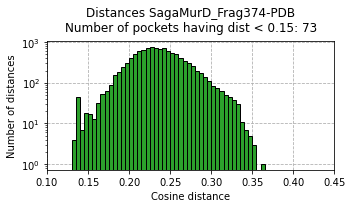

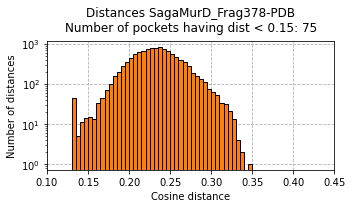

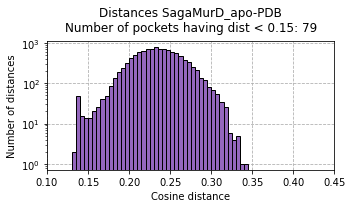

In [23]:
for d, st, color in zip(dist, sorted(murd_fps), ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple']):
    
    l = str(len([i for i in sorted(d) if i < 0.15]))
    
    plt.figure(figsize=(5, 3))
    plt.hist(d, bins=[i for i in np.arange(0, 0.4, 0.005)], ec='k', zorder=2, color=color)
    plt.grid(linestyle='--', zorder=-2)
    plt.title("Distances " + str(st) + "-PDB\nNumber of pockets having dist < 0.15: " + l, pad=10)
    plt.yscale('log')
    plt.xlabel("Cosine distance")
    plt.ylabel("Number of distances")
    plt.xlim([0.1, 0.45])
    plt.xticks([i for i in np.arange(0.1, 0.46, 0.05)])
    plt.tight_layout()
    # plt.savefig("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/distances/" + st + ".png", dpi=300)

In [140]:
### GET MOLECULES

In [141]:
pdbs = np.array(sorted(fps))
murds = np.array(sorted(murd_fps))

dist = pairwise_distances([murd_fps[i] for i in murds], [fps[i] for i in pdbs], metric='cosine')

In [309]:
data = []
path_to_reports = "/aloy/home/acomajuncosa/MurD/GitHub/alignment/MSA/reports"

a = 0.14
b = 0.32


for murd, d in zip(murds, dist):
    
    # Get all sts < 0.15
    maximum = len([i for i in d if i < a])
    maximum = len([i for i in d[:10]])
    maximum_r = len([i for i in d if i > b])
    close_pockets = []
    far_pockets = []
    
    # Sort sts
    ind = np.argsort(d)
    pdb_pockets = pdbs[ind][:maximum]
    pdb_pockets_r = pdbs[ind][::-1][:maximum_r]
        
    # Get molecules
    for p in tqdm.tqdm(pdb_pockets):

        uni, clust = p.split("_")[0], int(p.split("_")[1])
        rep = pickle.load(open(os.path.join(path_to_reports, uni, uni + ".pkl"), "rb"))
        sts = [p + "_" + i for i in rep if rep[i] == clust]
        close_pockets.extend(sts)
        
    for p in tqdm.tqdm(pdb_pockets_r):

        uni, clust = p.split("_")[0], int(p.split("_")[1])
        rep = pickle.load(open(os.path.join(path_to_reports, uni, uni + ".pkl"), "rb"))
        sts = [p + "_" + i for i in rep if rep[i] == clust]
        far_pockets.extend(sts)

    molecules = sorted(set([i.split("_")[5] for i in close_pockets]))
    far_molecules = sorted(set([i.split("_")[5] for i in far_pockets]))
        
    data.append([murd, maximum, len(close_pockets), len(molecules), maximum_r, len(far_pockets), len(far_molecules), ",".join(molecules), ",".join(far_molecules)])



data = pd.DataFrame(data, columns=['structures', 'n of pockets < ' + str(a), 'n of molecules [close]', 'n of molecules [unique] [close]', 'n of pockets > ' + str(b), 'n of molecules [far]', 'n of molecules [unique] [far]', 'molecules', 'molecules_far'])

100%|██████████| 17/17 [00:00<00:00, 2492.68it/s]


In [310]:
data

,structures,n of pockets < 0.14,n of molecules [close],n of molecules [unique] [close],n of pockets > 0.32,n of molecules [far],n of molecules [unique] [far],molecules,molecules_far
0,SagaMurD_Frag349,10,63,20,162,1114,162,"173,3MV,402,4WV,4WW,4WX,9SQ,DHC,DTP,ENO,FU8,HB...","1PB,1SS,1SV,2MD,2PK,2PV,2PW,2Q0,3ID,3PE,3R2,3R..."
1,SagaMurD_Frag373,10,60,17,31,172,48,"173,DHC,DTP,E2Q,ENO,FWD,HBX,HC4,KAI,MXN,NWD,PP...","3ID,3PE,4TA,8WO,ADN,AMP,BM3,CDP,CLR,CXS,F0P,FA..."
2,SagaMurD_Frag374,10,61,19,138,984,161,"173,BEZ,DHC,DTP,E2Q,ENO,FWD,HBX,HC4,KAI,MXN,NW...","1PB,2ER,2MD,3DD,3ID,3RG,4RG,4TA,5RG,61V,61W,8W..."
3,SagaMurD_Frag378,10,92,26,41,173,38,"173,402,4WV,4WW,4WX,9SQ,BEZ,DHC,DTP,E2Q,ENO,FU...","2ER,2MD,3ID,3R2,70H,8WO,AMP,AP5,C5P,CDP,CXS,D7..."
4,SagaMurD_apo,10,64,20,17,92,29,"173,402,4WV,4WW,4WX,83X,9SQ,DHC,DTP,ENO,FU8,HB...","3ID,4TA,8XQ,AMP,B85,C8E,CDP,CXS,F0P,FAD,JEV,MD..."


In [294]:
### ALL MOLECULES 

molecules = sorted(set([j for i in data['molecules'] for j in i.split(",")]))
mols = [Chem.MolFromInchi(pdbcode_to_inchi[i]) for i in molecules]
molecules = "\n".join(["\t".join([i,pdbcode_to_inchi[i]]) for i in molecules])

# with open("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/pocketvec_molecules.tsv", "w") as f:
#     f.write(molecules)

# img=Chem.Draw.MolsToGridImage(mols,molsPerRow=17,subImgSize=(600,600), maxMols=200)    
# img.save('/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/molecules/all.png')

In [242]:
# murds = [i for i in data['structures']]
# mols = [i for i in data['molecules']]

# pdbcode_to_inchi = pd.read_csv("../data/PDB/mapping/Components-inchi.ich.txt", sep="\t", header=None, names=['inchi', 'PDB', 'name'], usecols=[0,1])  
# # From df to dict's  // PDB-LIGs
# d = {}
# for i,j in zip(pdbcode_to_inchi['inchi'], pdbcode_to_inchi['PDB']):
#     if str(j) == 'nan': j = "NA"
#     d[str(j)] = i
# pdbcode_to_inchi = d; del d

# pdbcode_to_inchi['EPB'] = "InChI=1S/C27H41NO6S/c1-15-9-8-10-27(7)22(34-27)12-20(16(2)11-19-14-35-18(4)28-19)33-23(30)13-21(29)26(5,6)25(32)17(3)24(15)31/h11,14-15,17,20-22,24,29,31H,8-10,12-13H2,1-7H3/b16-11+/t15-,17+,20-,21-,22-,24-,27+/m0/s1"
# pdbcode_to_inchi['EPD'] = "InChI=1S/C27H41NO5S/c1-16-9-8-10-17(2)25(31)19(4)26(32)27(6,7)23(29)14-24(30)33-22(12-11-16)18(3)13-21-15-34-20(5)28-21/h11,13,15,17,19,22-23,25,29,31H,8-10,12,14H2,1-7H3/b16-11-,18-13+/t17-,19+,22-,23-,25-/m0/s1"
# pdbcode_to_inchi['GZX'] = "InChI=1S/C27H42N2O5S/c1-15-9-8-10-27(7)22(34-27)12-20(16(2)11-19-14-35-18(4)28-19)29-23(31)13-21(30)26(5,6)25(33)17(3)24(15)32/h11,14-15,17,20-22,24,30,32H,8-10,12-13H2,1-7H3,(H,29,31)/b16-11+/t15-,17+,20-,21-,22-,24-,27+/m0/s1"


In [243]:
# for i, j in zip(murds, mols):
    
#     m = [Chem.MolFromInchi(pdbcode_to_inchi[k]) for k in j.split(",")]
#     labs = [k for k in j.split(",")]
#     img=Chem.Draw.MolsToGridImage(m,molsPerRow=17,subImgSize=(300,300), maxMols=200, legends=labs)    
#     img.save('/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/molecules/' + str(i) + '.png')


In [244]:
### ECF4 to assess similarity between molecules in similar/different pockets

In [311]:
from signaturizer import Signaturizer
# load the predictor for B1 space (representing the Mode of Action)
sign = Signaturizer('A3')

/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


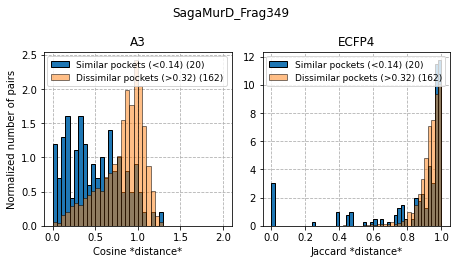

/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


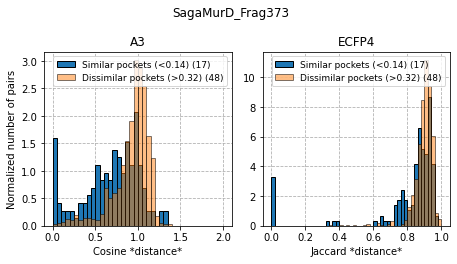

/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


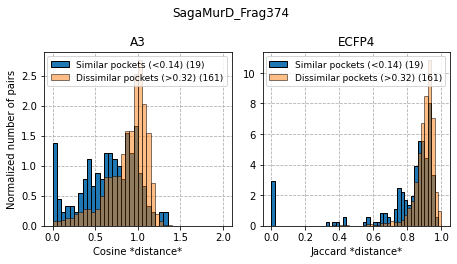

/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


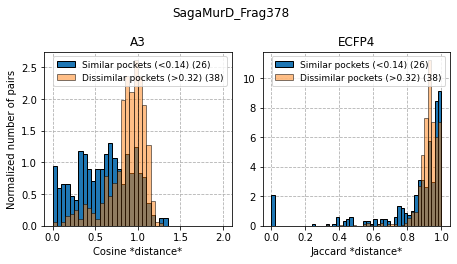

/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/acomajuncosa/programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


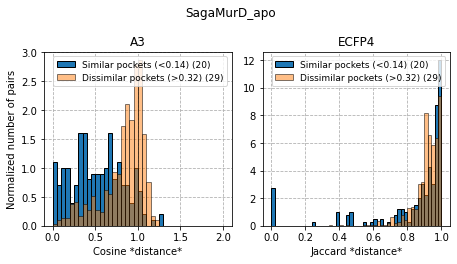

In [312]:
for st, mols, mols_far in zip(data['structures'], data['molecules'], data['molecules_far']):
    
    mols = [pdbcode_to_inchi[i] for i in mols.split(",")]
    mols_far = [pdbcode_to_inchi[i] for i in mols_far.split(",")]
    
    # A3 signatures
    mols_a3 = sign.predict(mols, keytype='InChI').signature
    mols_far_a3 = sign.predict(mols_far, keytype='InChI').signature
    
    mols_mfp = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromInchi(i), 2, nBits=2048)) for i in mols])
    mols_far_mfp = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromInchi(i), 2, nBits=2048)) for i in mols_far])
    
    dist_close = [j for i in pairwise_distances(mols_a3, metric='cosine') for j in i]
    dist_far = [j for i in pairwise_distances(mols_a3, mols_far_a3, metric='cosine') for j in i]
    
    
    fig, ax = plt.subplots(1, 2, figsize=(6.5, 3.7))
    fig.suptitle(st)
    
    ax[0].hist(dist_close, bins=[i for i in np.arange(0, 2.0001, 0.05)], ec='k', density=True, zorder=2, label='Similar pockets (<' + str(a) + ') (' + str(len(mols)) + ')')
    ax[0].hist(dist_far, bins=[i for i in np.arange(0, 2.0001, 0.05)], ec='k', density=True, alpha=0.5, zorder=2, label='Dissimilar pockets (>' + str(b) + ') (' + str(len(mols_far)) + ')')
    ax[0].grid(linestyle='--', zorder=-2)
    ax[0].set_title("A3")
    ax[0].set_xlabel("Cosine *distance*")
    ax[0].set_ylabel("Normalized number of pairs")
    ax[0].legend(prop={'size': 9})
    
    dist_close = [j for i in pairwise_distances(mols_mfp, metric='jaccard') for j in i]
    dist_far = [j for i in pairwise_distances(mols_mfp, mols_far_mfp, metric='jaccard') for j in i]
    
    
    ax[1].hist(dist_close, bins=[i for i in np.arange(0, 1.00001, 0.02)], ec='k', density=True, zorder=2, label='Similar pockets (<' + str(a) + ') (' + str(len(mols)) + ')')
    ax[1].hist(dist_far, bins=[i for i in np.arange(0, 1.00001, 0.02)], ec='k', density=True, alpha=0.5, zorder=2, label='Dissimilar pockets (>' + str(b) + ') (' + str(len(mols_far)) + ')')
    ax[1].grid(linestyle='--', zorder=-2)
    ax[1].set_title("ECFP4")
    ax[1].set_xlabel("Jaccard *distance*")
    ax[1].legend(prop={'size': 9})
    plt.tight_layout()
    plt.savefig("/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/molecular_similarities/" + st + ".png", dpi=300)
    plt.show()

In [259]:
aleix = sorted(set([j for i in data['molecules'] for j in i.split(",")]))
aleix = [Chem.MolFromInchi(pdbcode_to_inchi[i]) for i in aleix]

img=Chem.Draw.MolsToGridImage(aleix,molsPerRow=5,subImgSize=(300,300), maxMols=200)    
img.save('/aloy/home/acomajuncosa/MurD/GitHub/osa-murd/pocketvec/PDB/images/molecular_similarities/top10.png')